In [1]:
print("Import Packages")

using FFTW
using LinearAlgebra
using JLD2
using YAML
using PyPlot
using PyCall
using CosmoMMF

plt.style.use("light_mode")
mpl = pyimport("matplotlib")
@pyimport mpl_toolkits.axes_grid1 as axgrid

config = YAML.load_file("../config.yaml")

Import Packages

Dict{Any, Any} with 16 entries:
  "DM_particle_mass_Dark" => 0.00472716
  "run_name"              => "density_cube_snap_099_full_dm"
  "xmin"                  => 0.0
  "num_scales"            => 10
  "GAS_particle_mass_TNG" => 0.000743736
  "output_directory"      => "/global/cscratch1/sd/james12/NEXUS_analysis/"
  "nx"                    => 1024
  "N_GAS"                 => 15625000000
  "num_snaps"             => 1
  "snapfile_root"         => 99
  "algorithm"             => "NEXUS+"
  "input_directory"       => "/global/cscratch1/sd/james12/Illustris_TNG_Data/T…
  "simulation_type"       => "Dark"
  "DM_particle_mass_TNG"  => 0.00398343
  "N_DM"                  => 15625000000
  "xmax"                  => 205000.0

In [2]:
load_string = config["input_directory"] * config["run_name"] * ".jld2"

@load load_string den

print("The size of the original density cube:")
print(size(den))

The size of the original density cube:(1024, 1024, 1024)

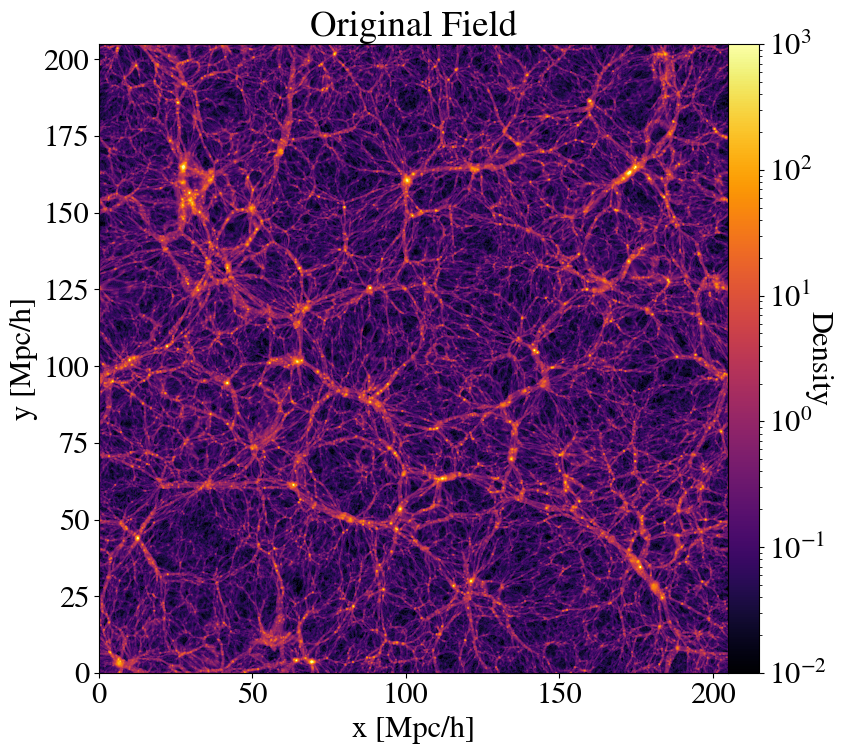

In [3]:
f, axes = plt.subplots(1,1, figsize=(12,8))
axes.set_title("Original Field")
im1 = axes.imshow(den[:,:,200], origin="lower", cmap="inferno", extent=(0,config["xmax"]/1000,0,config["xmax"]/1000), norm=mpl.colors.LogNorm(vmin=0.01, vmax=1000.0))
axes.set_xlabel("x [Mpc/h]")
axes.set_ylabel("y [Mpc/h]")
divider1 = axgrid.make_axes_locatable(axes)
cax1 = divider1.append_axes("right", size="5%", pad=0)
cbar = plt.colorbar(im1, cax=cax1)
cbar.set_label("Density", rotation=270)
f.tight_layout()

In [3]:
n = 512
wave_vecs = CosmoMMF.wavevectors3D(Float64,(n,n,n))
den = den[1:n, 1:n, 1:n] .+ 0.0001 
print("Log Gauss Smoothing of 512: ")
@time smoothed_loggauss = CosmoMMF.smooth_loggauss(den, √2 , wave_vecs)
print("\n")
print("Gauss Smoothing of 512: ")
@time smoothed_gauss = CosmoMMF.smooth_gauss(den, √2 , wave_vecs)
print("\nFinished Smoothing of 512^3")


Log Gauss Smoothing of 512:  68.141225 seconds (8.83 M allocations: 4.504 GiB, 0.89% gc time)

Gauss Smoothing of 512:  47.955561 seconds (1.07 M allocations: 11.059 GiB, 1.65% gc time)

Finished Smoothing of 512^3

# Visualization of Smoothing

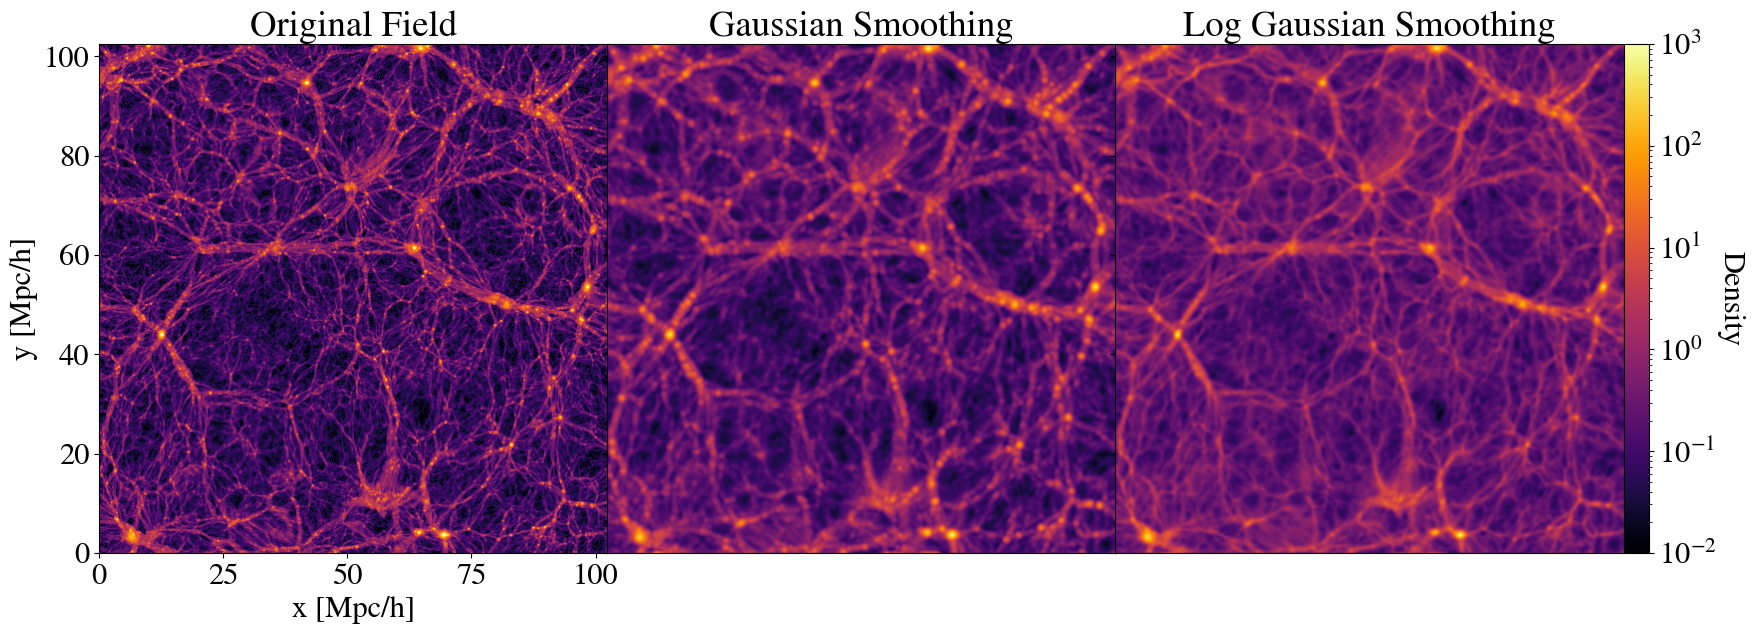

In [47]:
f, axes = plt.subplots(1,3,sharey=true, gridspec_kw = Dict("wspace" => -0.05, "hspace" => 0), figsize=(20,8))
axes[1].set_title("Original Field")
im1 = axes[1].imshow(den[:,:,200], origin="lower", cmap="inferno", extent=(0,config["xmax"]/2000,0,config["xmax"]/2000),norm=mpl.colors.LogNorm(vmin=0.01, vmax=1000.0))
divider1 = axgrid.make_axes_locatable(axes[1])
cax1 = divider1.append_axes("right", size="5%", pad=0)
cax1.set_axis_off()

axes[2].set_title("Gaussian Smoothing")
im2 = axes[2].imshow(smoothed_gauss[:,:,200], origin="lower", cmap="inferno", extent=(0,config["xmax"]/2000,0,config["xmax"]/2000),norm=mpl.colors.LogNorm(vmin=0.01, vmax=1000.0))
divider2 = axgrid.make_axes_locatable(axes[2])
cax2 = divider2.append_axes("right", size="5%", pad=0)
cax2.set_axis_off()

axes[3].set_title("Log Gaussian Smoothing")
im3 = axes[3].imshow(smoothed_loggauss[:,:,200], origin="lower", cmap="inferno", extent=(0,config["xmax"]/2000,0,config["xmax"]/2000),norm=mpl.colors.LogNorm(vmin=0.01, vmax=1000.0))
divider3 = axgrid.make_axes_locatable(axes[3])
cax3 = divider3.append_axes("right", size="5%", pad=0)

for ax in axes
    ax.set_aspect("equal")
    if ax == axes[1]
        ax.set_xlabel("x [Mpc/h]")
        ax.set_ylabel("y [Mpc/h]")
    else
        ax.set_xticks([])
        # ax.set_yticks([])
    end
end


    

cbar = plt.colorbar(im3, cax=cax3)
cbar.set_label("Density", labelpad=20, rotation=270)
# f.subplots_adjust(wspace=-10, hspace=-100)
# f.tight_layout()